<a href="https://colab.research.google.com/github/edonapllana/2020Resto7/blob/main/employee_promotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction
<h1> <b>Employees Promotion Prediction</b> </h1>

As part of Machine Learning project we will use an HR Dataset containing employees data taken by <a href="https://www.kaggle.com/datasets/arashnic/hr-ana">Kaggle</a>. </br>
While using the dataset above we are trying to predict if an employee will be promoted or not and what are the factors that have an impact in employee promotion by using Machine Learning Algorithms.


**Project steps that we will take:**

<ul>
<li>Exploratory Data Analysis (EDA):
    <ul>
      <li>EDA will be performed to understand the distribution of promoted employees;</li>
    </ul> 
  </li>
  <li>Data Preprocessing:
    <ul>
      <li>The dataset will be preprocessed by removing irrelevant columns, handling missing values, checking for outliers and more;
      </li>
    </ul>
  </li>  
  <li>Model Selection:
    <ul>
      <li>For model selection we will use some supervised algorithms and also deep learning. Supervised models that we will use include: Logistic Regression, Random Forest, Decision Tree, Naive-Bayes, Support Vector Machines (SVMs), K-Nearest Neighbour (KNN)</li>
    </ul>
  </li>
  <li>Model Evaluation:
    <ul>
      <li>We will evaluate the performance of the trained model on the testing data using metrics such as accuracy, precision, recall, and F1-score.</li>
    </ul>
  </li>
</ul> 


### General overview of Dataset

In [149]:
# Importing Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,f1_score, recall_score
import plotly.express as px

# Reading Datasets

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Loading Datasets
df_train = pd.DataFrame(train)

In [82]:
# Showing Dataset partically with some records

train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [83]:
# Showing the number of rows and columns of dataset (number_of_rows, number_of_columns)

train.shape

(54808, 13)

In [84]:
# Showing datasets comuns with more details

# :number of column starting from 0; 
# Column: Column name; 
#Non-Null Count: Counting non-null records for each column;
#Dtype: Data types of datas in our columns

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


>Our dataset has:
>
>* 54808 rows </br>
>* 13 columns </br>
>* 3 types of datas (int64, object & float64) </br>
>* colun awards_won? that is not named properly </br>
>* Null values

In [85]:
# Checking on a Statistic Summary

train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


>* Employees each have an id that is an integer number and ranges from 1 to ++ uniquely;</br>
* Previous year rating varies from 1 min to 5 max;</br>
* Age of the employee range is min 20 to 60 years max and the average age of the employees is 34;</br>
* The length of service of an employee ranges from 1 year to 37 years;</br>
* The average training score ranges from 39 to 99 max and average is 63;</br>
* The promoted employees percentage is 8.5% from mean 0.085170*100.</br>

In [86]:
train.describe(include=['object']).T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


>* There are 9 types of departments and the highest number of employees has Sales & Marketing department; </br> 
* There are 34 regions and the majority of employees are from region_2; </br>
* There are 3 types of education degree and most of the employees have a Bachelor's degree as part of education; </br>
* Among employees, up to 70% are men; </br>
* From 3 recruitment_channels, 56% of the employees are recruited from other channels.</br>

### Exploratory Data Analysis:

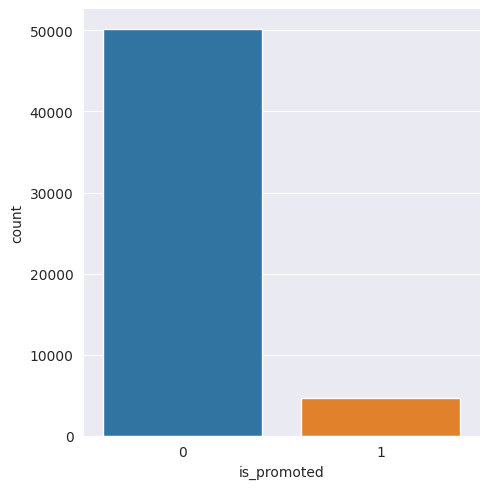

In [87]:
# First we will be plotting target Variable 

sns.set_style('darkgrid')
sns.catplot(x ='is_promoted', kind='count', data=train)
plt.show()

>From this graph we can see that the number of promoted employees is less than the unprommoted employees

###Data Distribution:


array([[<Axes: title={'center': 'employee_id'}>,
        <Axes: title={'center': 'no_of_trainings'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'previous_year_rating'}>,
        <Axes: title={'center': 'length_of_service'}>,
        <Axes: title={'center': 'awards_won?'}>],
       [<Axes: title={'center': 'avg_training_score'}>,
        <Axes: title={'center': 'is_promoted'}>, <Axes: >]], dtype=object)

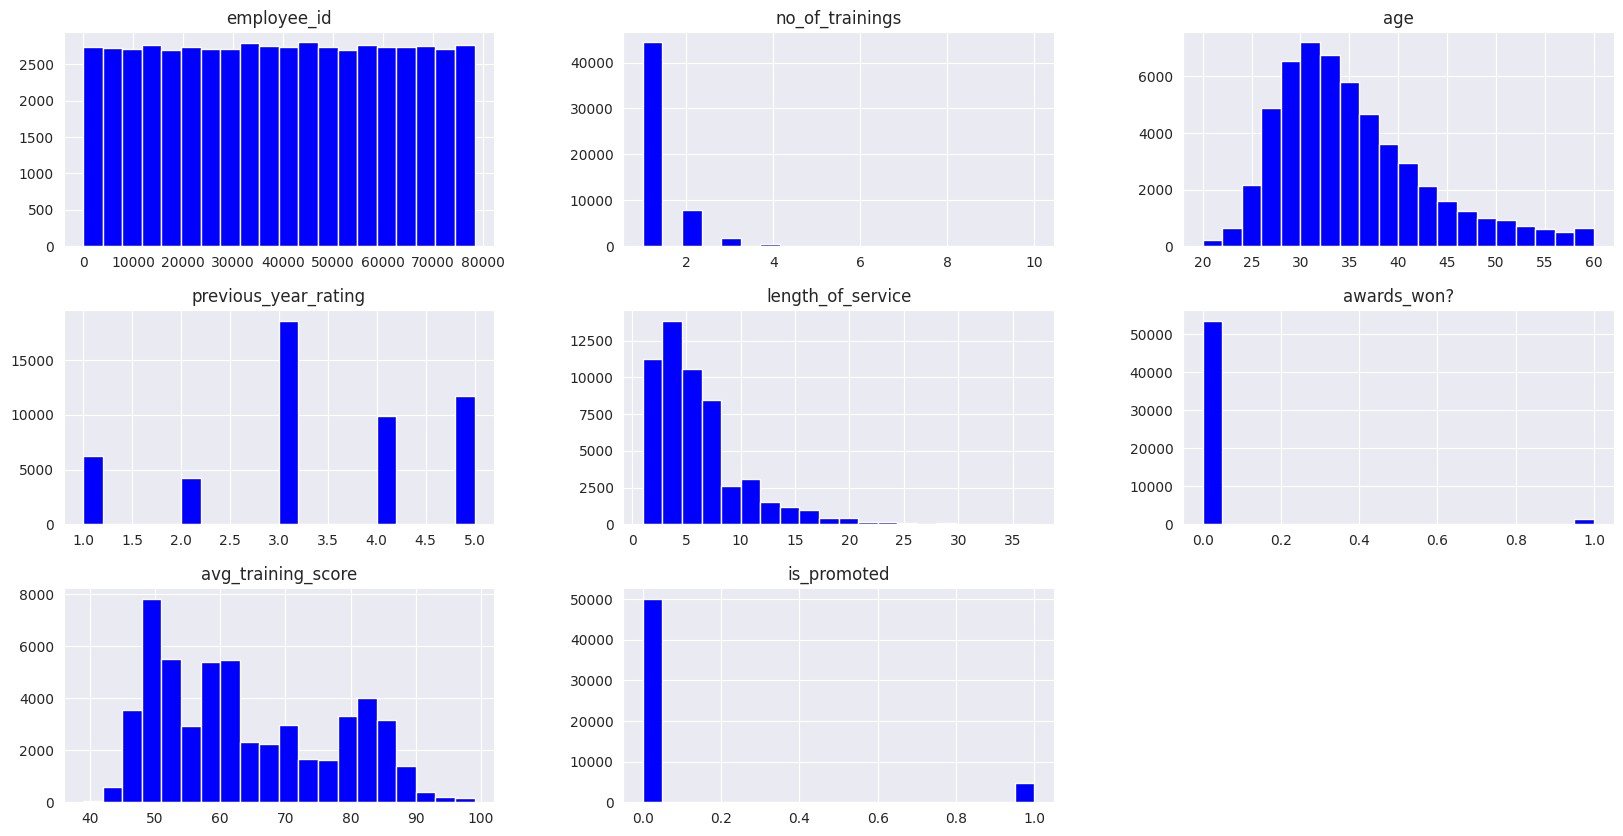

In [88]:
train.hist(bins = 20, figsize = (20,10), color = 'blue')

>**Age**
>
>*   The mean is greater than the median, i.e mean is 35 and median 33
*   Age of the employees ranges from 20 years to 60 years
*   Most of the employees ages range from 30 yrs and 40 yrs
>
>**Length of Service**
>
>*   Mean(5.8) > median(5.0)
*   Length of service ranges from 1 yr to 37 yrs
*   The length of service of most employees is centered between 1 and 6 years
>
>**Average training score**
>
>*   Mean(63.38) > median(60.00)
*   Average training score ranges from 39 and 99

####Department:

<Figure size 1200x1000 with 0 Axes>

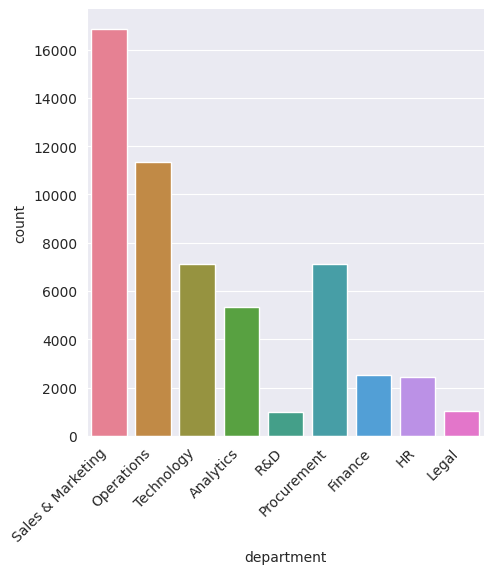

In [89]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='department', kind='count', data=train, palette='husl')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

>Top three departments with the most number of employees are:
>
>*   Sales & Marketing
*   Operations
*   Procurement
>
>R&D department has the lowest number of employees in the organisation.

<Figure size 1200x1000 with 0 Axes>

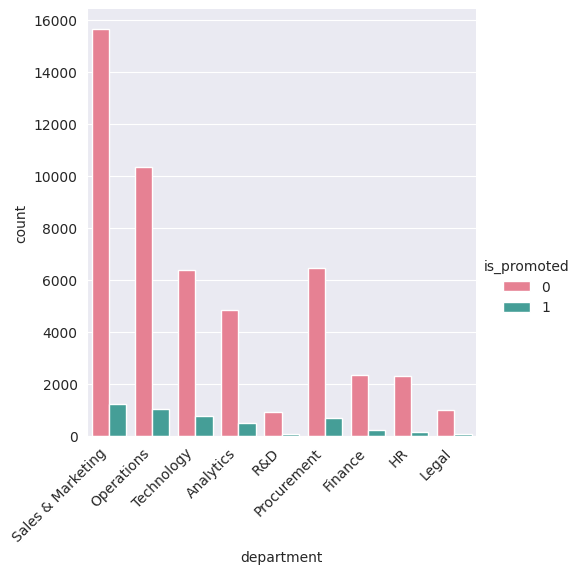

In [90]:
plt.figure(figsize=(12, 10))
sns.catplot(x='department', hue='is_promoted', kind='count', data=train, palette='husl')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [91]:
# To see the graph above with better statistics we grouped the data by department and is_promoted columns
# and showed the total of employeed promoted for each department

train.groupby('department')['is_promoted'].sum()

department
Analytics             512
Finance               206
HR                    136
Legal                  53
Operations           1023
Procurement           688
R&D                    69
Sales & Marketing    1213
Technology            768
Name: is_promoted, dtype: int64

####Education:

<Figure size 1200x1000 with 0 Axes>

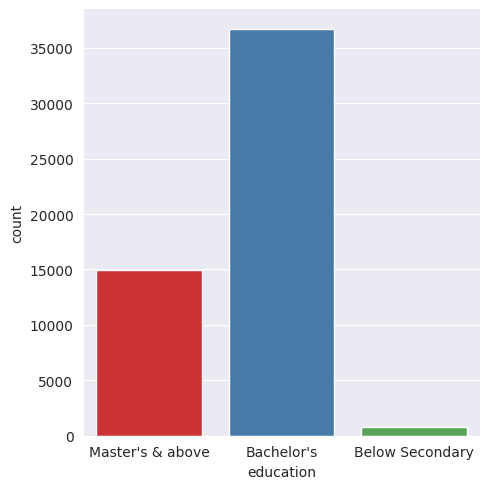

In [92]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='education', kind='count', data=train, palette='Set1')
plt.show()

>*   More than 35000 employees hold a bachelor's degree
*   At least 15000 employees have a Master's and PhD



<Figure size 1200x1000 with 0 Axes>

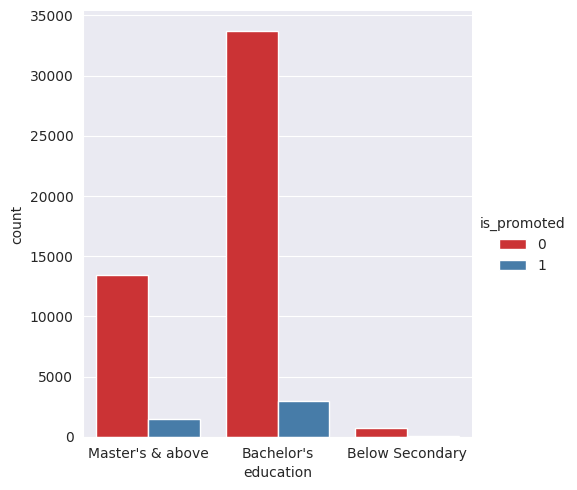

In [93]:
# Shows how many employees are promoted and not promoted based on their education

plt.figure(figsize=(12, 10))
sns.catplot(x='education', hue='is_promoted', kind='count', data=train, palette='Set1')
plt.show()

In [94]:
# To see the graph above with better statistics we grouped the data by education and is_promoted columns
# and showed the total of employeed promoted based on their education 

train.groupby('education')['is_promoted'].sum()

education
Bachelor's          3008
Below Secondary       67
Master's & above    1471
Name: is_promoted, dtype: int64

####Gender:

<Figure size 1200x1000 with 0 Axes>

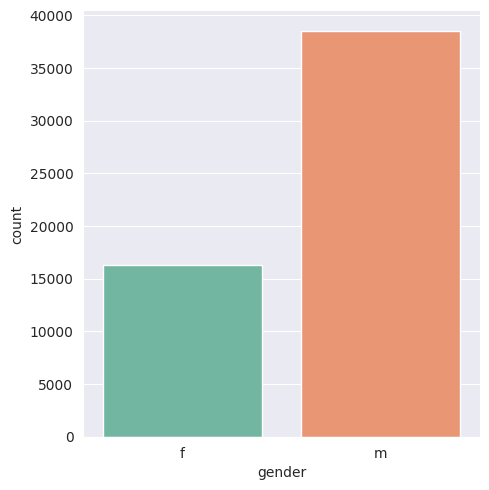

In [95]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='gender', kind='count', data=train, palette='Set2')
plt.show()

>* Male employees account for more than 35000 employees in the company
*   The number of female employees is slightly above 15000




<Figure size 1200x1000 with 0 Axes>

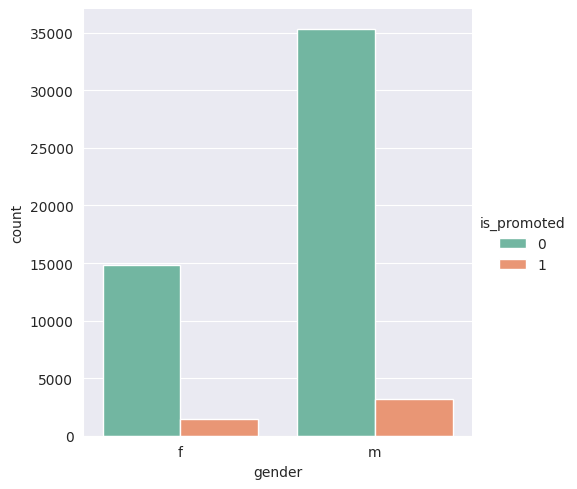

In [96]:
# Shows how many employees are promoted and not promoted based on their gender

plt.figure(figsize=(12, 10))
sns.catplot(x='gender', hue='is_promoted', kind='count', data=train, palette='Set2')
plt.show()

In [97]:
# To see the graph above with better statistics we grouped the data by gender and is_promoted columns
# and showed the total of employeed promoted based on their gender 

train.groupby('gender')['is_promoted'].sum()

gender
f    1467
m    3201
Name: is_promoted, dtype: int64

####Recruitment Channel:

<Figure size 1200x1000 with 0 Axes>

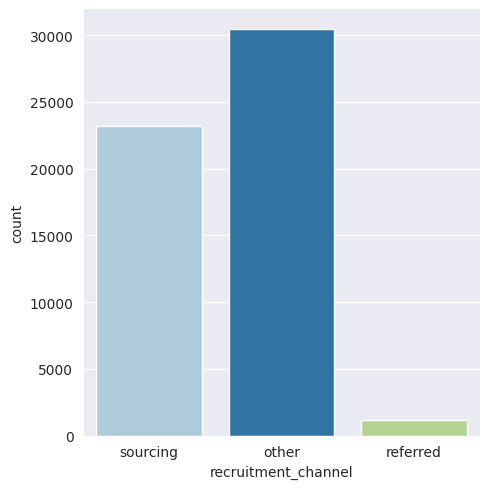

In [98]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='recruitment_channel', kind='count', data=train, palette='Paired')
plt.show()

> Most of the employees are recruited using other recruitment


<Figure size 1200x1000 with 0 Axes>

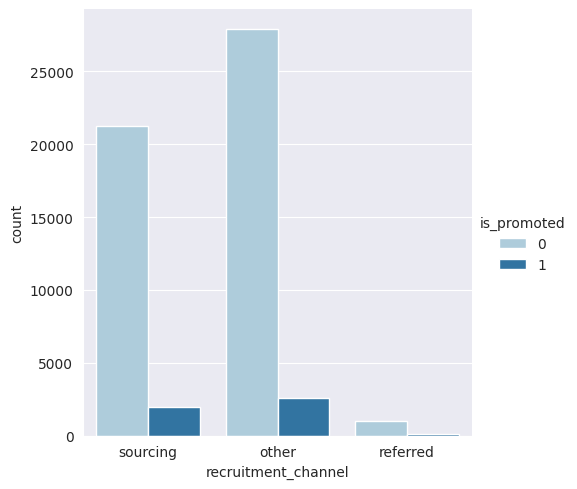

In [99]:
# Shows how many employees are promoted and not promoted based on the recruitment channel

plt.figure(figsize=(12, 10))
sns.catplot(x='recruitment_channel', hue='is_promoted', kind='count', data=train, palette='Paired')
plt.show()

In [100]:
# To see the graph above with better statistics we grouped the data by recruitment_channel and is_promoted columns
# and showed the total of employeed promoted based on the recruitment_channel 

train.groupby('recruitment_channel')['is_promoted'].sum()

recruitment_channel
other       2556
referred     138
sourcing    1974
Name: is_promoted, dtype: int64

####Number of trainings:

<Figure size 1200x1000 with 0 Axes>

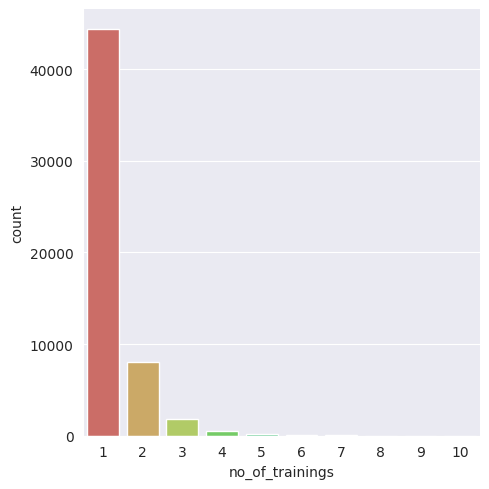

In [101]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='no_of_trainings', kind='count', data=train, palette='hls')
plt.show()

> Most of the employees have at least attended 1 training.

<Figure size 1200x1000 with 0 Axes>

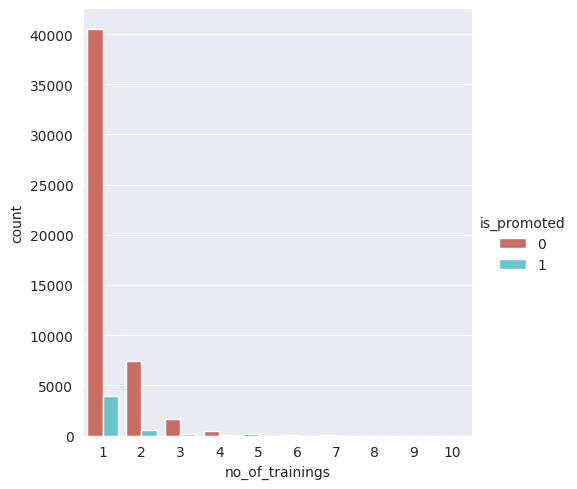

In [102]:
# Shows how many employees are promoted and not promoted based on the number of trainings

plt.figure(figsize=(12, 10))
sns.catplot(x='no_of_trainings', hue='is_promoted', kind='count', data=train,palette='hls')
plt.show()

In [103]:
# To see the graph above with better statistics we grouped the data by no_of_trainings and is_promoted columns
# and showed the total of employeed promoted based on the no_of_trainings 

train.groupby('no_of_trainings')['is_promoted'].sum()

no_of_trainings
1     3910
2      605
3      122
4       26
5        3
6        2
7        0
8        0
9        0
10       0
Name: is_promoted, dtype: int64

####Previous Year Rating:

<Figure size 1200x800 with 0 Axes>

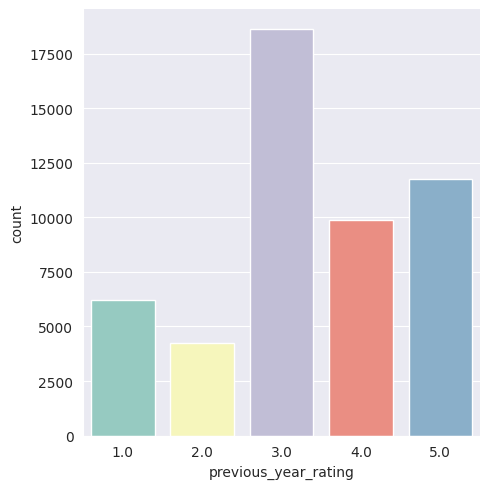

In [104]:
plt.figure(figsize=(12,8))
sns.catplot(x ='previous_year_rating', kind='count', data=train, palette='Set3')
plt.show()

> Most of the employees have been in the company for 3 years

<Figure size 1200x1000 with 0 Axes>

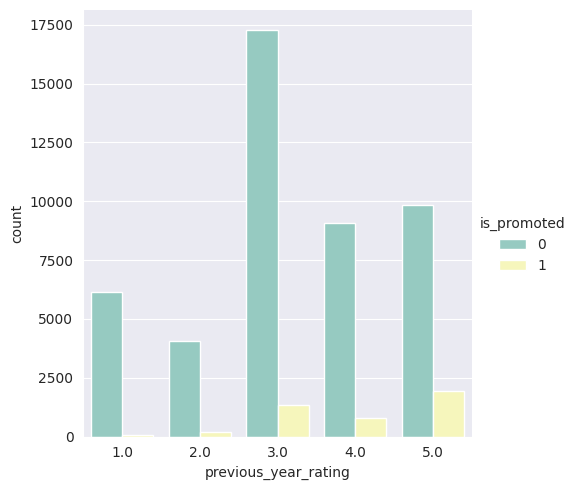

In [105]:
# Shows how many employees are promoted and not promoted based on the previous year rating

plt.figure(figsize=(12, 10))
sns.catplot(x='previous_year_rating', hue='is_promoted', kind='count', data=train, palette='Set3')
plt.show()

In [106]:
# To see the graph above with better statistics we grouped the data by previous_year_rating and is_promoted columns
# and showed the total of employeed promoted based on the previous_year_rating 

train.groupby('previous_year_rating')['is_promoted'].sum()

previous_year_rating
1.0      88
2.0     181
3.0    1355
4.0     784
5.0    1921
Name: is_promoted, dtype: int64

####Awards won:

<Figure size 1200x1000 with 0 Axes>

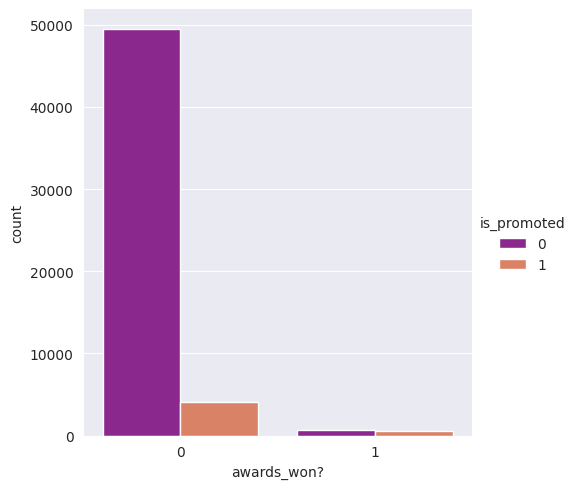

In [107]:
# Shows how many employees are promoted and not promoted based on the awards they won

plt.figure(figsize=(12, 10))
sns.catplot(x ='awards_won?',hue='is_promoted', kind='count', data=train, palette='plasma')
plt.show()

In [108]:
# To see the graph above with better statistics we grouped the data by awards_won and is_promoted columns
# and showed the total of employeed promoted based on the awards_won

train.groupby('awards_won?')['is_promoted'].sum()

awards_won?
0    4109
1     559
Name: is_promoted, dtype: int64

####Region:

<Figure size 1200x1000 with 0 Axes>

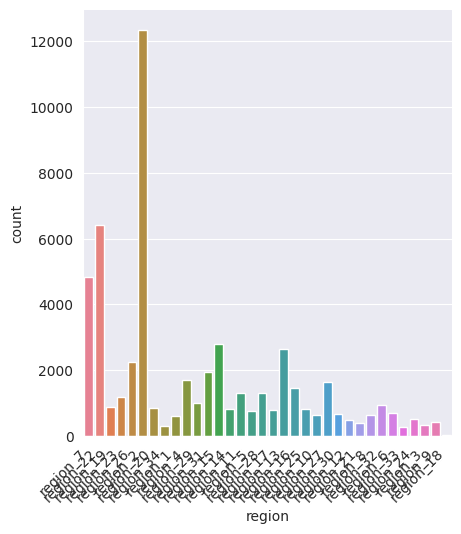

In [109]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='region', kind='count', data=train, palette='husl')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

<Figure size 1200x1000 with 0 Axes>

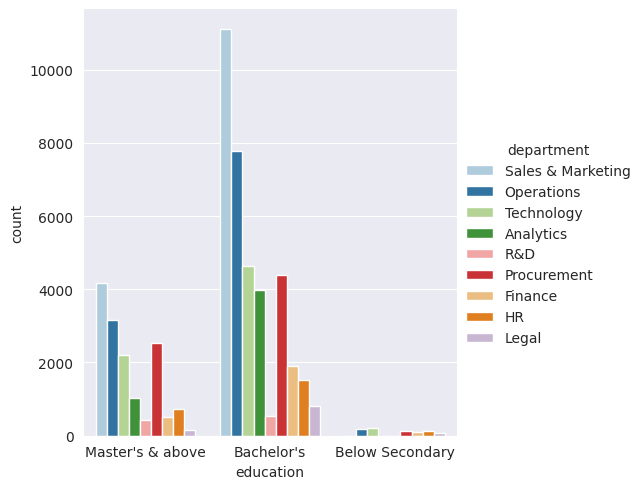

In [110]:
# Shows the number of employees grouped by their department and education

plt.figure(figsize=(12, 10))
sns.catplot(x ='education', hue='department', kind='count', data=train, palette='Paired')
plt.show()

Most employees are from sales & marketing department have a bachelor's degree

<Figure size 1200x1000 with 0 Axes>

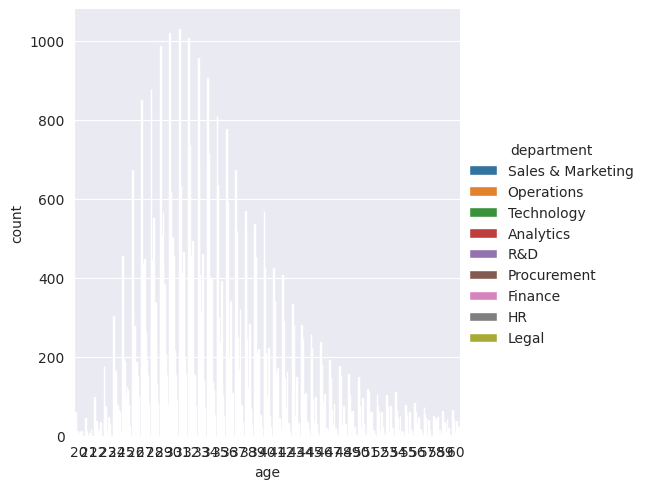

In [111]:
# Shows the number of employees grouped by their department and age

plt.figure(figsize=(12, 10))
sns.catplot(x ='age', hue='department', kind='count', data=train)
plt.show()

<Figure size 1200x1000 with 0 Axes>

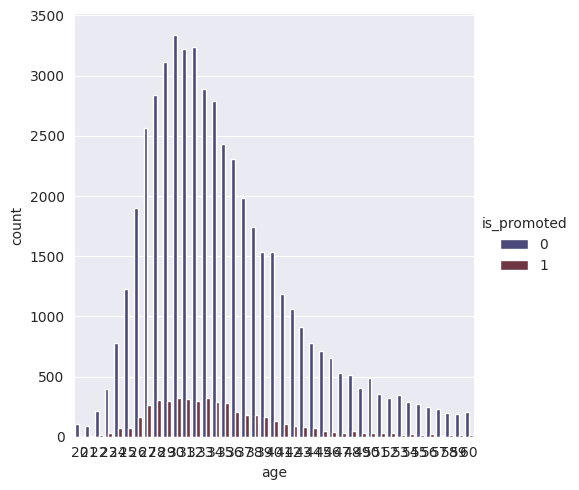

In [112]:
# Shows the number of employees grouped by their age and tells how many are promoted and not promoted

plt.figure(figsize=(12, 10))
sns.catplot(x ='age', hue='is_promoted', kind='count', data=train, palette='icefire')
plt.show()

<Figure size 1200x1000 with 0 Axes>

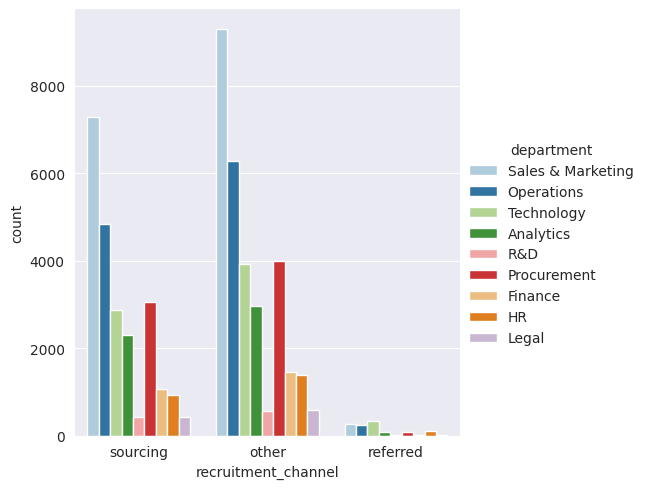

In [113]:
# Shows the number of employees grouped by the recruitment_channel and department

plt.figure(figsize=(12, 10))
sns.catplot(x ='recruitment_channel', hue='department', kind='count', data=train, palette='Paired')
plt.show()

> Most sales & marketing department employees are recruited through other recruitment channels


### Prepocessing:

In [114]:
# First we will rename the column awards_won? to awards_won for the train and test data

train.rename(columns = {'awards_won?':'awards_won'}, inplace = True)

# Get columns

train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [115]:
# Rename the column 

test.rename(columns = {'awards_won?':'awards_won'}, inplace = True)

# Show changes 

test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score'],
      dtype='object')

In [116]:
# We created a dataframe to show total number of missing values 
#and percentage of missing values in both training and test data

# Total missing data

train_total = train.isnull().sum()
test_total = test.isnull().sum()

# Percentage of missing values

train_percent= ((train.isnull().sum()/train.shape[0])*100)
test_percent= ((test.isnull().sum()/test.shape[0])*100)

data_missing= pd.DataFrame({'train total':train_total, 'train percent': train_percent,'test total': test_total, 'test percent': test_percent})
data_missing.sort_values(by='train total', ascending=False).head()

,train total,train percent,test total,test percent
previous_year_rating,4124,7.524449,1812.0,7.713921
education,2409,4.395344,1034.0,4.401873
age,0,0.000000,0.0,0.000000
avg_training_score,0,0.000000,0.0,0.000000
awards_won,0,0.000000,0.0,0.000000


> There are null values in two columns: education and previous_year_rating

In [117]:
# We checked the rows with null values to discover if the missing values have any pattern

train[train['previous_year_rating'].isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,0,61,0


> From the output above, we can see that almost all the rows with missing values for 'previous_year_rating' have a 'length of service'=1. This can be interpreted to mean that employees with only 1 year of service to the company have missing values for 'previous_year_rating' because they were not part of the company in the previous year.

In [118]:
train[(train['length_of_service'] == 1)&train['previous_year_rating'].isnull()]


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,0,61,0


In [119]:
# We tested the hypothesis

train.previous_year_rating[train['length_of_service'] == 1]

10      NaN
23      NaN
29      NaN
56      NaN
58      NaN
         ..
54703   NaN
54734   NaN
54746   NaN
54773   NaN
54801   NaN
Name: previous_year_rating, Length: 4547, dtype: float64

In [120]:
# Checking for pattern for missing values in 'education' column

train[train['education'].isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,77,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,57,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,48,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,48,0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54692,14821,Sales & Marketing,region_2,NaN,f,sourcing,1,35,3.0,7,0,53,0
54717,7684,Analytics,region_2,NaN,m,sourcing,1,32,3.0,4,0,86,0
54729,1797,HR,region_2,NaN,f,other,1,28,3.0,2,0,53,0
54742,38935,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,47,0


In [121]:
#Checking for pattern for missing values in 'education' column

train[train['education'].isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,77,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,57,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,48,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,48,0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54692,14821,Sales & Marketing,region_2,NaN,f,sourcing,1,35,3.0,7,0,53,0
54717,7684,Analytics,region_2,NaN,m,sourcing,1,32,3.0,4,0,86,0
54729,1797,HR,region_2,NaN,f,other,1,28,3.0,2,0,53,0
54742,38935,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,47,0


> For missing values in the "education" column, we are going to use mode imputation. Mode imputation is a method of imputing missing values by replacing them with the most frequent value (mode) of the variable. 

In [122]:
# Fill the missing values in education with the most frequent value

train['education']=train['education'].fillna(train.education.mode()[0])
test['education']=test['education'].fillna(test.education.mode()[0])

# Fill the missing values in previous_year_rating with 0 since the employees with only 1 year of
# service to the company were not part of the company in the previous year.

train['previous_year_rating']=train['previous_year_rating'].fillna(0)
test['previous_year_rating']=test['previous_year_rating'].fillna(0)

In [123]:
# Checking if the null values are still present

print('Number of missing values in the training dataset', train.isnull().sum().sum())
print('Number of missing values in the test dataset', test.isnull().sum().sum())

Number of missing values in the training dataset 0
Number of missing values in the test dataset 0


####Checking for Outliers:

In [124]:
# Since outliers are only posssible in numerical data, let's analyze the numerical columns

train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,1,35,5.0,8,0,49,0
1,65141,1,30,5.0,4,0,60,0
2,7513,1,34,3.0,7,0,50,0
3,2542,2,39,1.0,10,0,50,0
4,48945,1,45,3.0,2,0,73,0


> An outlier can only be available in the 'avg_training score' and 'length_of_service' columns



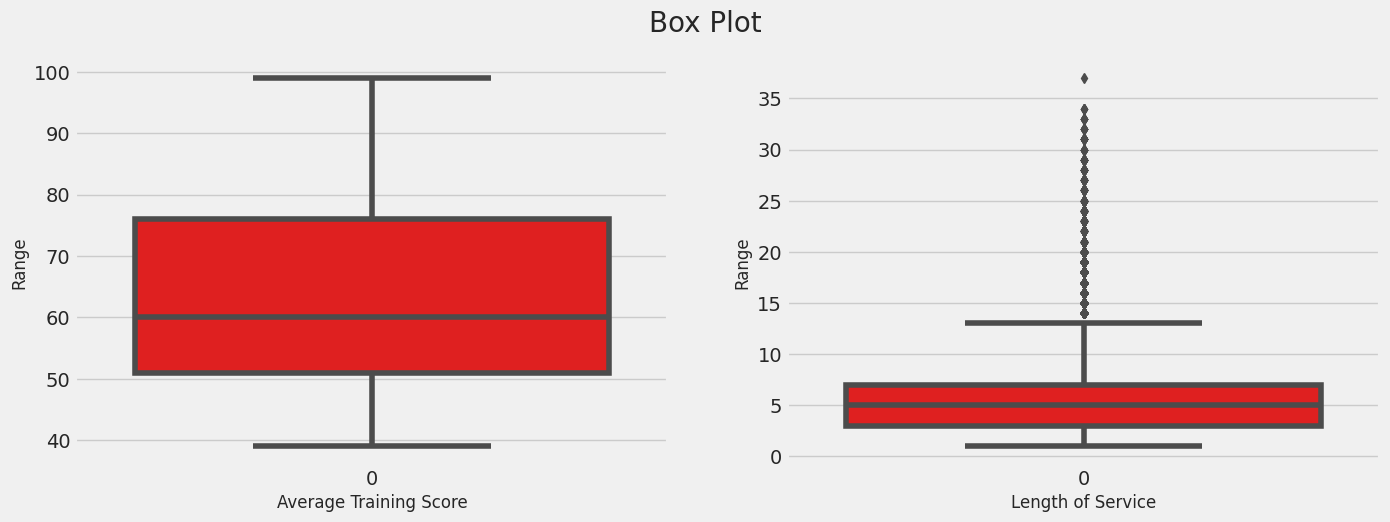

In [125]:
# Lets check the boxplots for the columns where we suspect for outliers

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for average training score

plt.subplot(1, 2, 1)
sns.boxplot(train['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for length of service

plt.subplot(1, 2, 2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

> In the Length of Service graph, we can see some points after the Max Value, which can be termed to be as Outliers.

In [126]:
# We handled this outlier by replacing the value with 13 for any length_of_service bigger than 13

train['length_of_service']=train[train['length_of_service'] > 13] = 13

####Handling Categorical Columns
>  <ul>
    <li>There are various ways to encode categorical columns into Numerical columns</li>
    <li>This is an Essential Step, as the Machine Learning Models only works with Numerical Values.</li>
    <li>Here, we are going to use Business Logic to encode the education column</li>
    <li>Then we will use the Label Encoder, to Department and Gender Columns</li>
  </ul>

In [127]:
# Lets check the categorical columns present in the data
train.select_dtypes('object').head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


In [128]:
# Lets check the value counts for the education column

train['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [129]:
# We are going to encode these categorical columns to convert them into numerical columns

# We encoded the education in their degree of importance 

train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"), (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"), (3, 2, 1))

# We are going to use Label Encoding for Gender and Department to convert them into Numerical

le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])
train['recruitment_channel'] = le.fit_transform(train['recruitment_channel'])
test['recruitment_channel'] = le.fit_transform(test['recruitment_channel'])
train['region'] = le.fit_transform(train['region'])
test['region'] = le.fit_transform(test['region'])

# Lets check whether we still have any categorical columns left after encoding

print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)

Index([], dtype='object')
Index([], dtype='object')


In [130]:
# Lets check the data after encoding

train.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,7,31,3,0,2,1,35,5.0,13,0,49,0
1,65141,4,14,2,1,0,1,30,5.0,13,0,60,0
2,7513,7,10,2,1,2,1,34,3.0,13,0,50,0


####Dropping employee_id column:

In [131]:
train = train.drop('employee_id',1)

<ipython-input-131-23596fe67a72>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train = train.drop('employee_id',1)


###Model Training:

In [132]:
#Defining independent and dependent variables
X = train.drop('is_promoted', axis=1)
Y = train.is_promoted
X.shape, Y.shape

((54808, 11), (54808,))

Using SMOTE and Standard Scaler:

In [133]:
#Since the dataset is imbalanced, we will use SMOTE() to balance the dataset
X_res, Y_res  = SMOTE().fit_resample(X, Y.values.ravel())

#Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size = 0.3, random_state = 42)

# It is very important to scale all the features of the dataset into the same scale so
# we are going to use the standardization method.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


####Logistic Regression:

In [134]:
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)
predict = log_model.predict(X_test)

print("Train data Accuracy :", log_model.score(X_train, Y_train))
print("Test data Accuracy :", log_model.score(X_test, Y_test))

Train data Accuracy : 0.6831585845347313
Test data Accuracy : 0.6809932189868368


In [135]:
# Print confusion matrix
print(confusion_matrix(Y_test, predict))
cm = confusion_matrix(Y_test, predict)
px.imshow(cm,text_auto=True, title='Confusion Matrix of the Model')

[[10208  4978]
 [ 4619 10279]]


In [136]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68     15186
           1       0.67      0.69      0.68     14898

    accuracy                           0.68     30084
   macro avg       0.68      0.68      0.68     30084
weighted avg       0.68      0.68      0.68     30084



####Random Forest

In [139]:
# Instantiate random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train random forest classifier
rf.fit(X_train, Y_train)

# Predict target variable for test set
Y_pred = rf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9395692062225768


In [144]:
# Print confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print("Confusion matrix:\n", cm)

px.imshow(cm,text_auto=True, title='Confusion Matrix of the Model')

Confusion matrix:
 [[14272   914]
 [  904 13994]]


In [146]:
# Show classification report

print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68     15186
           1       0.67      0.69      0.68     14898

    accuracy                           0.68     30084
   macro avg       0.68      0.68      0.68     30084
weighted avg       0.68      0.68      0.68     30084



In [ ]:
'''# Define hyperparameters to tune
# param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate random forest classifier
rf = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

# Predict target variable for test set using best estimator from GridSearchCV
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
print("Accuracy:", accuracy)

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)'''